<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
df = pd.read_csv("DMV_Written_Tests.csv")
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
scores = df[['DMV_Test_1', 'DMV_Test_2']].values
results = df['Results'].values

### Task 3: Visualize the Data
---

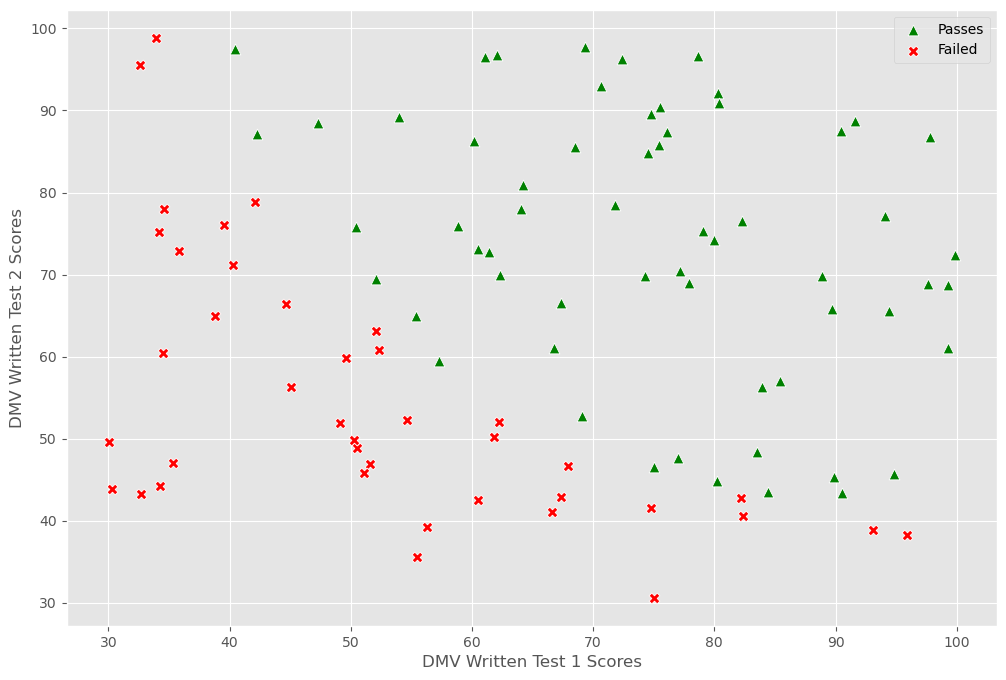

In [8]:
passed = (results == 1).reshape(100,1)
failed = (results == 0).reshape(100,1)

ax = sns.scatterplot(x=scores[passed[:, 0], 0],
                     y=scores[passed[:, 0], 1],
                     marker = "^",
                    color='green',
                    s=60)

sns.scatterplot(x=scores[failed[:, 0], 0],
                y=scores[failed[:, 0], 1],
                marker = "X",
                color='red',
                s=60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(['Passes', 'Failed'])
plt.show();

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [9]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

In [10]:
logistic_function(0)

0.5

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [12]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x, theta))
    error = (y * np.log(y_pred)) + (1 - y) * np.log(1 - y_pred)
    cost = - 1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0], gradient

### Task 6: Cost and Gradient at Initialization
---

In [14]:
#Normalization
mean_scores = np.mean(scores, axis = 0)
std_scores = np.std(scores, axis = 0)
scores = (scores - mean_scores) / std_scores

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis = 1)
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradients at initialization", gradient)

Cost at initialization 0.693147180559946
Gradients at initialization [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [15]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [16]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

In [17]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: 0.20489382035120143


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

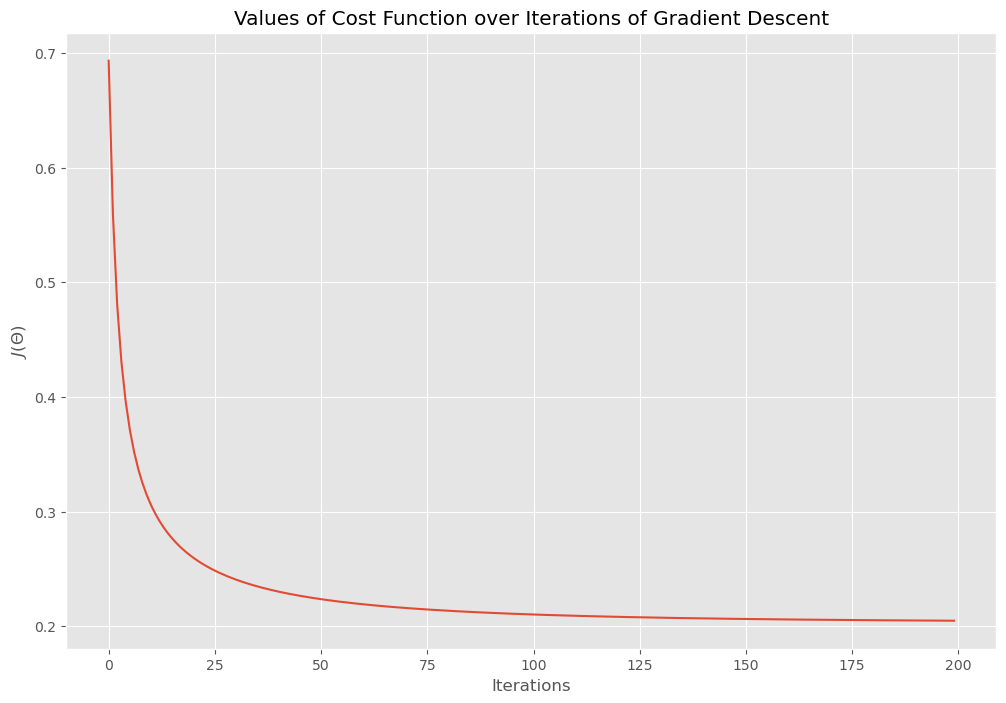

In [18]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over Iterations of Gradient Descent");

We see a dramatic drop with every increase of gradient descent, and after a certain point we see that the curve is actually is asymptotic. After certain runs the cost function is minimized and approaches global minimum. This tells us that the gradient descent algorithm works.

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

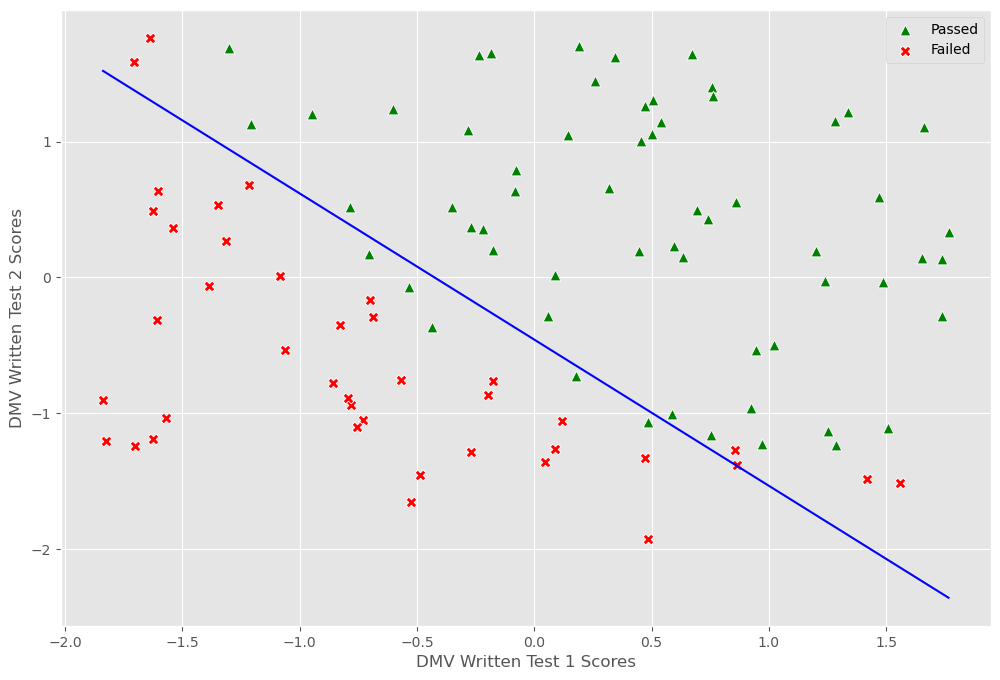

In [20]:
ax = sns.scatterplot(x=X[passed[:, 0], 1],
                     y=X[passed[:, 0], 2],
                     marker = "^",
                    color='green',
                    s=60)

sns.scatterplot(x=X[failed[:, 0], 1],
                y=X[failed[:, 0], 2],
                marker = "X",
                color='red',
                s=60)

ax.legend(['Passed','Failed'])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x=x_boundary, y=y_boundary, color="blue")
plt.show();

The linear decision boundary does pretty good job on seperating the data into passed and failed classes. If we run more iterations of the gradient descent we can also move this line downwards.

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [22]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0

In [25]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 89 %


In [29]:
test = np.array([50, 79])
test = (test - mean_scores) / std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on DMV written tests have a", 
      np.round(probability[0], 2), "probability of passing")

A person who scores 50 and 79 on DMV written tests have a 0.71 probability of passing
